In [1]:
# Observations:
#     1. Capomulin exhibits the greatest positive outcome out of the four treatments that we examined. 
#        It is the only treatment that displays a negative relationship between tumor volume and time,
#         and also exhibits the lowest number of metastatic site growth over time. 
#     2. In regard to tumor volume over time, Ketapril, Infubinol and Placebo all exhibit effectively 
#        the same result, especially considering that the standard error of each time point appear to overlap.
#        Similar outcomes are observable in both the Metastatic Site change, and the survival over time plots,
#        witht the exception of Infubinol's  effect on Metastatic Site change, in which it trends toward outcomes
#        in between Capomulin and the rest. 
#     3. For Capomulin to be considered an effective treatment, its effect on tumor size must continue the linear
#        trend that it already exhibits, ultimatly reducing tumor size to zero. Furthermore, we would need to see 
#         the metastatic sites line turn negative and drop to zero. The slope between the last two data points is 
#         lower than the previous, so it may be heading toward this trend already.
    

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

drug_file = "data/mouse_drug_data.csv"
trial_file = "data/clinicaltrial_data.csv"
drug_df = pd.read_csv(drug_file)
trial_df = pd.read_csv(trial_file)

In [3]:
drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
df = pd.merge(trial_df, drug_df, on='Mouse ID')

df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
mean_volume = df.groupby(['Drug', 'Timepoint']).mean()
mean_volume_df = pd.DataFrame(mean_volume)
mean_volume_df = mean_volume_df.reset_index()
mean_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [7]:
volume_sem = df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
volume_sem = pd.DataFrame(volume_sem)
volume_sem = volume_sem.reset_index()
volume_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
site_sem = df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
site_sem = pd.DataFrame(site_sem)
site_sem = site_sem.reset_index()
site_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


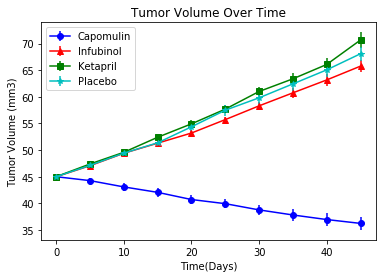

In [9]:
capomulin = mean_volume_df.loc[mean_volume_df['Drug'] == "Capomulin"]
infubinol = mean_volume_df.loc[mean_volume_df['Drug'] == "Infubinol"]
ketapril = mean_volume_df.loc[mean_volume_df['Drug'] == "Ketapril"]
placebo = mean_volume_df.loc[mean_volume_df['Drug'] == "Placebo"]

capomulin_sem = volume_sem.loc[volume_sem['Drug'] == "Capomulin"]
infubinol_sem = volume_sem.loc[volume_sem['Drug'] == "Infubinol"]
ketapril_sem = volume_sem.loc[volume_sem['Drug'] == "Ketapril"]
placebo_sem = volume_sem.loc[volume_sem['Drug'] == "Placebo"]

plt.errorbar(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'], yerr=capomulin_sem['Tumor Volume (mm3)'], marker='o', color='b')
plt.errorbar(infubinol['Timepoint'], infubinol['Tumor Volume (mm3)'], yerr=infubinol_sem['Tumor Volume (mm3)'], marker='^', color='r')
plt.errorbar(ketapril['Timepoint'], ketapril['Tumor Volume (mm3)'], yerr=ketapril_sem['Tumor Volume (mm3)'], marker='s', color='g')
plt.errorbar(placebo['Timepoint'], placebo['Tumor Volume (mm3)'], yerr=placebo_sem['Tumor Volume (mm3)'], marker='*', color='c')
plt.title('Tumor Volume Over Time')
plt.xlabel('Time(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))

plt.savefig('TumorVolume_ot')


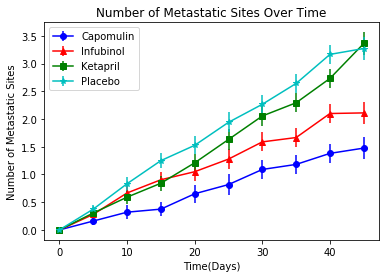

In [10]:
capomulin_site_sem = site_sem.loc[site_sem['Drug'] == "Capomulin"]
infubinol_site_sem = site_sem.loc[site_sem['Drug'] == "Infubinol"]
ketapril_site_sem = site_sem.loc[site_sem['Drug'] == "Ketapril"]
placebo_site_sem = site_sem.loc[site_sem['Drug'] == "Placebo"]

plt.errorbar(capomulin['Timepoint'], capomulin['Metastatic Sites'], capomulin_site_sem['Metastatic Sites'], marker='o', color='b')
plt.errorbar(infubinol['Timepoint'], infubinol['Metastatic Sites'], capomulin_site_sem['Metastatic Sites'], marker='^', color='r')
plt.errorbar(ketapril['Timepoint'], ketapril['Metastatic Sites'],  capomulin_site_sem['Metastatic Sites'], marker='s', color='g')
plt.errorbar(placebo['Timepoint'], placebo['Metastatic Sites'], capomulin_site_sem['Metastatic Sites'], marker='*', color='c')
plt.title('Number of Metastatic Sites Over Time')
plt.xlabel('Time(Days)')
plt.ylabel('Number of Metastatic Sites')
plt.legend(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
plt.savefig('MetastaticSites_ot')

In [11]:
#Survival Rates
survival_counts = df.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
survival_counts = pd.DataFrame(survival_counts)
survival_counts = survival_counts.reset_index()
survival_counts = survival_counts.rename(columns={"Tumor Volume (mm3)": "Mouse Counts"})
survival_counts.head()

,Drug,Timepoint,Mouse Counts
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


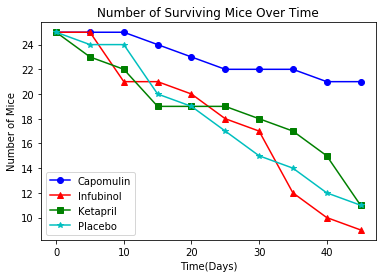

In [12]:
capomulin_mice = survival_counts.loc[survival_counts['Drug'] == "Capomulin"]
infubinol_mice = survival_counts.loc[survival_counts['Drug'] == "Infubinol"]
ketapril_mice = survival_counts.loc[survival_counts['Drug'] == "Ketapril"]
placebo_mice = survival_counts.loc[survival_counts['Drug'] == "Placebo"]

plt.plot(capomulin_mice['Timepoint'], capomulin_mice['Mouse Counts'], marker='o', color='b')
plt.plot(infubinol_mice['Timepoint'], infubinol_mice['Mouse Counts'], marker='^', color='r')
plt.plot(ketapril_mice['Timepoint'], ketapril_mice['Mouse Counts'], marker='s', color='g')
plt.plot(placebo_mice['Timepoint'], placebo_mice['Mouse Counts'], marker='*', color='c')
plt.title('Number of Surviving Mice Over Time')
plt.xlabel('Time(Days)')
plt.ylabel('Number of Mice')
plt.legend(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
plt.savefig('survival_rates_ot')


Correlation between Tumor Volume and Time is: -1.0


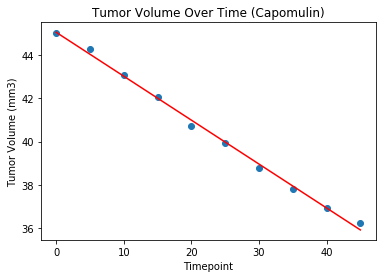

In [13]:
corr1 = round(stats.pearsonr(capomulin['Timepoint'],capomulin['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between Tumor Volume and Time is: {corr1}")
slope1 = stats.linregress(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'])
y_values1 = capomulin['Timepoint'] * slope1[0] + slope1[1]
plt.scatter(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'])
plt.plot(capomulin['Timepoint'], y_values1, color="red")
plt.title('Tumor Volume Over Time (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()




Correlation between Tumor Volume and Time is: 0.95


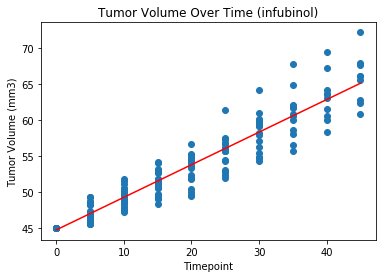

In [14]:
infubinol = df.loc[df['Drug'] == "Infubinol"]
ketapril = df.loc[df['Drug'] == "Ketapril"]
placebo = df.loc[df['Drug'] == "Placebo"]

corr2 = round(stats.pearsonr(infubinol['Timepoint'], infubinol['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between Tumor Volume and Time is: {corr2}")
slope2 = stats.linregress(infubinol['Timepoint'], infubinol['Tumor Volume (mm3)'])
y_values2 = infubinol['Timepoint'] * slope2[0] + slope2[1]
plt.scatter(infubinol['Timepoint'], infubinol['Tumor Volume (mm3)'])
plt.plot(infubinol['Timepoint'], y_values2, color="red")
plt.title('Tumor Volume Over Time (infubinol)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


Correlation between Tumor Volume and Time is: 0.93


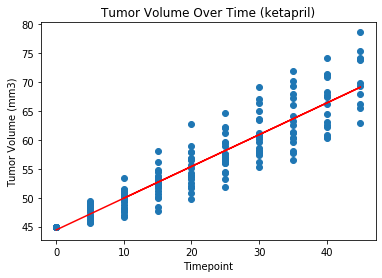

In [15]:
corr2 = round(stats.pearsonr(ketapril['Timepoint'], ketapril['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between Tumor Volume and Time is: {corr2}")
slope2 = stats.linregress(ketapril['Timepoint'], ketapril['Tumor Volume (mm3)'])
y_values2 = ketapril['Timepoint'] * slope2[0] + slope2[1]
plt.scatter(ketapril['Timepoint'], ketapril['Tumor Volume (mm3)'])
plt.plot(ketapril['Timepoint'], y_values2, color="red")
plt.title('Tumor Volume Over Time (ketapril)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


Correlation between Tumor Volume and Time is: 0.91


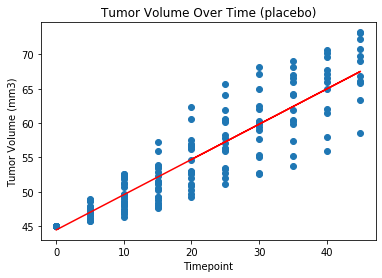

In [16]:
corr2 = round(stats.pearsonr(placebo['Timepoint'], placebo['Tumor Volume (mm3)'])[0],2)
print(f"Correlation between Tumor Volume and Time is: {corr2}")
slope2 = stats.linregress(placebo['Timepoint'], placebo['Tumor Volume (mm3)'])
y_values2 = placebo['Timepoint'] * slope2[0] + slope2[1]
plt.scatter(placebo['Timepoint'], placebo['Tumor Volume (mm3)'])
plt.plot(placebo['Timepoint'], y_values2, color="red")
plt.title('Tumor Volume Over Time (placebo)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


Correlation between Metastatic Sites and Time is: 1.0


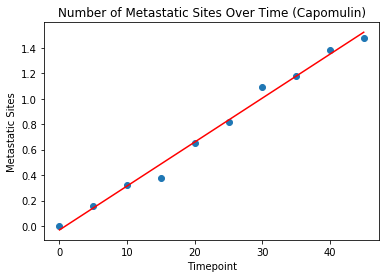

In [17]:
#Creating a scatter plot that shows how the number of metastatic sites changes over time for each treatment.

corr1 = round(stats.pearsonr(capomulin['Timepoint'], capomulin['Metastatic Sites'])[0],2)
print(f"Correlation between Metastatic Sites and Time is: {corr1}")
slope1 = stats.linregress(capomulin['Timepoint'], capomulin['Metastatic Sites'])
y_values1 = capomulin['Timepoint'] * slope1[0] + slope1[1]
plt.scatter(capomulin['Timepoint'], capomulin['Metastatic Sites'])
plt.plot(capomulin['Timepoint'], y_values1, color="red")
plt.title('Number of Metastatic Sites Over Time (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Metastatic Sites')

plt.show()



Correlation between Metastatic Sites and Time is: 0.63


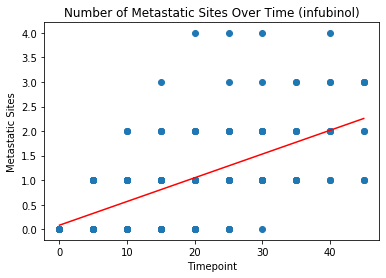

In [18]:
corr1 = round(stats.pearsonr(infubinol['Timepoint'], infubinol['Metastatic Sites'])[0],2)
print(f"Correlation between Metastatic Sites and Time is: {corr1}")
slope1 = stats.linregress(infubinol['Timepoint'], infubinol['Metastatic Sites'])
y_values1 = infubinol['Timepoint'] * slope1[0] + slope1[1]
plt.scatter(infubinol['Timepoint'], infubinol['Metastatic Sites'])
plt.plot(infubinol['Timepoint'], y_values1, color="red")
plt.title('Number of Metastatic Sites Over Time (infubinol)')
plt.xlabel('Timepoint')
plt.ylabel('Metastatic Sites')

plt.show()



Correlation between Metastatic Sites and Time is: 0.71


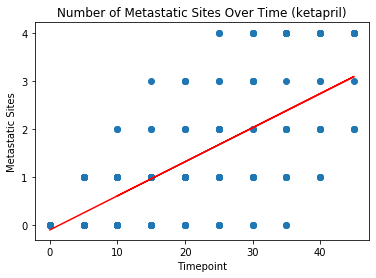

In [19]:
corr1 = round(stats.pearsonr(ketapril['Timepoint'], ketapril['Metastatic Sites'])[0],2)
print(f"Correlation between Metastatic Sites and Time is: {corr1}")
slope1 = stats.linregress(ketapril['Timepoint'], ketapril['Metastatic Sites'])
y_values1 = ketapril['Timepoint'] * slope1[0] + slope1[1]
plt.scatter(ketapril['Timepoint'], ketapril['Metastatic Sites'])
plt.plot(ketapril['Timepoint'], y_values1, color="red")
plt.title('Number of Metastatic Sites Over Time (ketapril)')
plt.xlabel('Timepoint')
plt.ylabel('Metastatic Sites')

plt.show()



Correlation between Metastatic Sites and Time is: 0.78


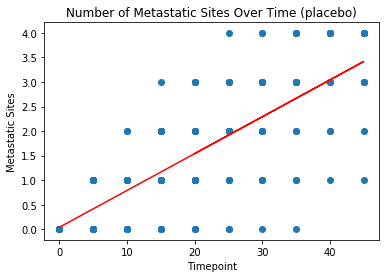

In [20]:
corr1 = round(stats.pearsonr(placebo['Timepoint'], placebo['Metastatic Sites'])[0],2)
print(f"Correlation between Metastatic Sites and Time is: {corr1}")
slope1 = stats.linregress(placebo['Timepoint'], placebo['Metastatic Sites'])
y_values1 = placebo['Timepoint'] * slope1[0] + slope1[1]
plt.scatter(placebo['Timepoint'], placebo['Metastatic Sites'])
plt.plot(placebo['Timepoint'], y_values1, color="red")
plt.title('Number of Metastatic Sites Over Time (placebo)')
plt.xlabel('Timepoint')
plt.ylabel('Metastatic Sites')

plt.show()

